In [108]:
import datetime as dt
import pandas as pd
import scipy as s
import numpy as np
import names
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [248]:
article = pd.read_csv('https://raw.githubusercontent.com/jecd/talknerdy2me/master/data4fig_setup.csv')
article

,DOI,authors,number,title,combined
0,DOI0,James Johnson,0.0,title 0,James Johnson. title 0. DOI0
1,DOI1,Regenia Voigt,0.1,title 1,Regenia Voigt. title 1. DOI1
2,DOI2,Willie Campos,0.2,title 2,Willie Campos. title 2. DOI2
3,DOI3,Linda Guy,0.3,title 3,Linda Guy. title 3. DOI3
4,DOI4,Ronald Ioele,0.4,title 4,Ronald Ioele. title 4. DOI4
5,DOI5,Joseph Mcgee,0.5,title 5,Joseph Mcgee. title 5. DOI5
6,DOI6,Jerry Jones,0.6,title 6,Jerry Jones. title 6. DOI6
7,DOI7,Kim Craft,0.7,title 7,Kim Craft. title 7. DOI7
8,DOI8,Doris Tate,0.8,title 8,Doris Tate. title 8. DOI8
9,DOI9,Jessica Pierce,0.9,title 9,Jessica Pierce. title 9. DOI9


In [280]:
## play around with recursion
DG = nx.DiGraph() # initialize networkx graph

# this specifies original article from .csv
DOI = tuple(article.combined[article.number == 0])

# this function gets original data from original article query
def get_data(DOI):
    # go get data from DOI
    data_from_node = {DOI:1}
    return data_from_node

# this function gets the 10 citations from the original article
def find_children(DOI):
    # get children DOIs into list from .csv
    article_list = tuple(article.combined[article.number <= 1]) # get DOI children
    print('Original article [0] citations: \n', article_list, '\n')
    return (article_list)

# this function gets 10 articles from each of the orignal 10 citations
def find_childrens_children(DOI):
    child_list = find_children(DOI)
    result = []
    result.append(child_list)
    for child in range(1,len(child_list)):
        child_child = tuple(article.combined[(article.number > child) & (article.number <= child + 1)])
        print('working on article ', child, 'citations:')
        print(child_child,'\n')
        result.append(child_child)
    return (result)

# this function recursively adds the 10 original citations to the original
# article and the 10 citations for each of those articles 
def recursive_add(DOI):
    if not DG.has_node(DOI): # if there is no node for this DOI
        node_data = get_data(DOI) 
        DG.add_node(DOI)
        child_list = find_children(DOI)
        childrens_children = find_childrens_children(DOI)
        for child in range(1,len(child_list)):
            recursive_add(DOI)
            print( 'child loop 1: ', child)
            DG.add_edge(childrens_children[0][0], childrens_children[0][child])
            print( 'original article & citation: ', childrens_children[0][0], '& ', childrens_children[0][child])
            for children in range(0,len(child_list)-1):
                if child < 10:
                    DG.add_edge(childrens_children[0][child],childrens_children[child][children])
                    print( 'citations of citations: ', childrens_children[0][child], '& ', childrens_children[child][children])
                elif child == 10:
                    DG.add_edge(childrens_children[0][child],childrens_children[child][children])
                    print( 'citations of citations: ', childrens_children[0][child], '& ', childrens_children[child][children])
                else: 
                    DG.add_edge(childrens_children[0][child],childrens_children[child+1][0])
                    print( 'citations of citations: ', childrens_children[0][child], '& ', childrens_children[child+1][0])
        
            print( 'child loop 2:', children)
        


        
            

In [281]:
get_data(DOI) # see if function works

{('James Johnson. title 0. DOI0',): 1}

In [282]:
find_children(DOI) # see if function works

Original article [0] citations: 
 ('James Johnson. title 0. DOI0', 'Regenia Voigt. title 1. DOI1', 'Willie Campos. title 2. DOI2', 'Linda Guy. title 3. DOI3', 'Ronald Ioele. title 4. DOI4', 'Joseph Mcgee. title 5. DOI5', 'Jerry Jones. title 6. DOI6', 'Kim Craft. title 7. DOI7', 'Doris Tate. title 8. DOI8', 'Jessica Pierce. title 9. DOI9', 'Anita Mccoy. title 10. DOI10') 



('James Johnson. title 0. DOI0',
 'Regenia Voigt. title 1. DOI1',
 'Willie Campos. title 2. DOI2',
 'Linda Guy. title 3. DOI3',
 'Ronald Ioele. title 4. DOI4',
 'Joseph Mcgee. title 5. DOI5',
 'Jerry Jones. title 6. DOI6',
 'Kim Craft. title 7. DOI7',
 'Doris Tate. title 8. DOI8',
 'Jessica Pierce. title 9. DOI9',
 'Anita Mccoy. title 10. DOI10')

In [283]:
find_childrens_children(DOI)

Original article [0] citations: 
 ('James Johnson. title 0. DOI0', 'Regenia Voigt. title 1. DOI1', 'Willie Campos. title 2. DOI2', 'Linda Guy. title 3. DOI3', 'Ronald Ioele. title 4. DOI4', 'Joseph Mcgee. title 5. DOI5', 'Jerry Jones. title 6. DOI6', 'Kim Craft. title 7. DOI7', 'Doris Tate. title 8. DOI8', 'Jessica Pierce. title 9. DOI9', 'Anita Mccoy. title 10. DOI10') 

working on article  1 citations:
('James Abeyta. title 11. DOI11', 'Mary Johnson. title 12. DOI12', 'Bonnie Averett. title 13. DOI13', 'Arthur Lopes. title 14. DOI14', 'David Walker. title 15. DOI15', 'John Burtt. title 16. DOI16', 'Cherie Mcdaniel. title 17. DOI17', 'David Ortiz. title 18. DOI18', 'Elizabeth Shay. title 19. DOI19', 'Tina Craig. title 20. DOI20') 

working on article  2 citations:
('Allen Haraway. title 21. DOI21', 'Grace Beardsley. title 22. DOI22', 'Ruth Barretto. title 23. DOI23', 'Diane Outhouse. title 24. DOI24', 'April Wyatt. title 25. DOI25', 'Elmer Mohammad. title 26. DOI26', 'William Kimbrell

[('James Johnson. title 0. DOI0',
  'Regenia Voigt. title 1. DOI1',
  'Willie Campos. title 2. DOI2',
  'Linda Guy. title 3. DOI3',
  'Ronald Ioele. title 4. DOI4',
  'Joseph Mcgee. title 5. DOI5',
  'Jerry Jones. title 6. DOI6',
  'Kim Craft. title 7. DOI7',
  'Doris Tate. title 8. DOI8',
  'Jessica Pierce. title 9. DOI9',
  'Anita Mccoy. title 10. DOI10'),
 ('James Abeyta. title 11. DOI11',
  'Mary Johnson. title 12. DOI12',
  'Bonnie Averett. title 13. DOI13',
  'Arthur Lopes. title 14. DOI14',
  'David Walker. title 15. DOI15',
  'John Burtt. title 16. DOI16',
  'Cherie Mcdaniel. title 17. DOI17',
  'David Ortiz. title 18. DOI18',
  'Elizabeth Shay. title 19. DOI19',
  'Tina Craig. title 20. DOI20'),
 ('Allen Haraway. title 21. DOI21',
  'Grace Beardsley. title 22. DOI22',
  'Ruth Barretto. title 23. DOI23',
  'Diane Outhouse. title 24. DOI24',
  'April Wyatt. title 25. DOI25',
  'Elmer Mohammad. title 26. DOI26',
  'William Kimbrell. title 27. DOI27',
  'Michele Brasfield. title 2

In [284]:
recursive_add(DOI) # see if function works

Original article [0] citations: 
 ('James Johnson. title 0. DOI0', 'Regenia Voigt. title 1. DOI1', 'Willie Campos. title 2. DOI2', 'Linda Guy. title 3. DOI3', 'Ronald Ioele. title 4. DOI4', 'Joseph Mcgee. title 5. DOI5', 'Jerry Jones. title 6. DOI6', 'Kim Craft. title 7. DOI7', 'Doris Tate. title 8. DOI8', 'Jessica Pierce. title 9. DOI9', 'Anita Mccoy. title 10. DOI10') 

Original article [0] citations: 
 ('James Johnson. title 0. DOI0', 'Regenia Voigt. title 1. DOI1', 'Willie Campos. title 2. DOI2', 'Linda Guy. title 3. DOI3', 'Ronald Ioele. title 4. DOI4', 'Joseph Mcgee. title 5. DOI5', 'Jerry Jones. title 6. DOI6', 'Kim Craft. title 7. DOI7', 'Doris Tate. title 8. DOI8', 'Jessica Pierce. title 9. DOI9', 'Anita Mccoy. title 10. DOI10') 

working on article  1 citations:
('James Abeyta. title 11. DOI11', 'Mary Johnson. title 12. DOI12', 'Bonnie Averett. title 13. DOI13', 'Arthur Lopes. title 14. DOI14', 'David Walker. title 15. DOI15', 'John Burtt. title 16. DOI16', 'Cherie Mcdaniel. 

In [251]:
child_list = find_children(DOI)
childrens_children = find_childrens_children(DOI)

for child in range(1,len(child_list)):
    recursive_add(DOI)
    print( 'child loop 1: ', child)
    DG.add_edge(childrens_children[0][0], childrens_children[0][child])
    print( 'adding: ', childrens_children[0][0], '& ', childrens_children[0][child])
    for children in range(0,len(child_list)-1):
        if child < 10:
            DG.add_edge(childrens_children[0][child],childrens_children[child][children])
            print( 'adding: ', childrens_children[0][child], '& ', childrens_children[child][children])
        elif child == 10:
            DG.add_edge(childrens_children[0][child],childrens_children[child][children])
            print( 'adding: ', childrens_children[0][child], '& ', childrens_children[child][children])
        else: 
            DG.add_edge(childrens_children[0][child],childrens_children[child+1][0])
            print( 'adding: ', childrens_children[0][child], '& ', childrens_children[child+1][0])
        
        print( 'child loop 2:', children)

working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
child loop 1:  1
adding:  James Johnson. title 0. DOI0 &  Regenia Voigt. title 1. DOI1
adding:  Regenia Voigt. title 1. DOI1 &  James Abeyta. title 11. DOI11
child loop 2: 0
adding:  Regenia Voigt. title 1. DOI1 &  Mary Johnson. title 12. DOI12
child loop 2: 1
adding:  Regenia Voigt. title 1. DOI1 &  Bonnie Averett. title 13. DOI13
child loop 2: 2
adding:  Regenia Voigt. title 1. DOI1 &  Arthur Lopes. title 14. DOI14
child loop 2: 3
adding:  Regenia Voigt. title 1. DOI1 &  David Walker. title 15. DOI15
child loop 2: 4
adding:  Regenia Voigt. title 1. DOI1 &  John Burtt. title 16. DOI16
child loop 2: 5
adding:  Regenia Voigt. title 1. DOI1 &  Cherie Mcdaniel. title 17. DOI17
child loop 2: 6
adding:  Regenia Voigt. title 1. DOI1 &  David Ortiz. title 18. DOI18
child loop 2: 7
adding:  Regenia Voigt. title 1. DOI1 &  Elizabeth Shay. title 19. DOI19
child loop 

/Users/candacepeacock/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/candacepeacock/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/candacepeacock/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/candacepeacock/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

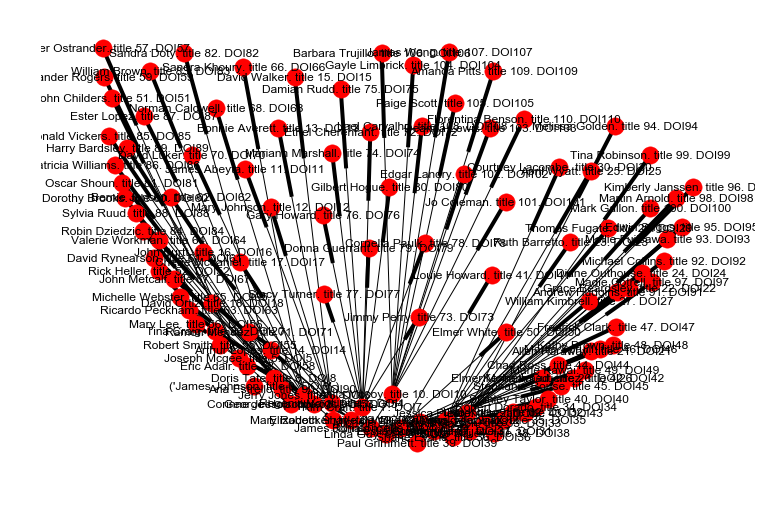

In [287]:
sns.set_context("poster")
pos=nx.spring_layout(DG)
# nx.draw_networkx_nodes(DG,pos,node_size=700)
# nx.draw_networkx_edges(DG,pos,
#                     width=6)
#nx.draw_networkx_labels(DG,pos,font_size=15,font_family='sans-serif')

plt.axis('off')
nx.draw(DG, with_labels=True)